In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [50]:
local_path = r'C:/Users/alons/OneDrive/Documentos/GitHub/Tarea-NSP/'
datos = pd.read_csv(local_path + 'CitasEspecialidades.csv')
print(datos['Especialidad'].unique(),"\n")
print(datos['TipoProfesional'].unique(),"\n")
print(datos['TipoAtencion'].unique(),"\n")
print(datos['CodPrestacion'].unique(),"\n")
print(datos['Prestacion'].unique(),"\n")
print(datos['Agenda'].unique(),"\n")
print(datos['Sexo'].unique(),"\n")
print(datos['EstadoCita'].unique(),"\n")
print(datos.columns, "\n")
print(datos.shape, "es el shape de la base de datos")#visualisation of Data Frame

['Traumatología Infantil' 'Oftalmología'] 

['Médico Cirujano' 'Médico' 'Enfermera (o)' 'Tecnólogo Médico'] 

['Consulta Nueva' 'Consulta Repetida' 'CN - ABIERTA APS' nan 'PROC - HLCM'] 

[ 101111.  101113.  101003.  101112.  106004.      nan  103002.  102001.
 1201009.] 

['Consulta Integral De Especialidades En Cirugia, Gine-Obstetricia, Ortopedia Y Traumat Hospital 1 Y 2'
 'Consulta Integral De Especialidades En Medic Interna Y Subesp, Oftalmo, Neuro, Onco Hospital 1 Y 2'
 'CONSULTA  MEDICA  ESPECIALIDADES'
 'Consulta Integral De Especialidad Urologia, Orl, Med Fisica Rehab, Dermato, Pediatria Hospital 1 Y 2'
 'Despacho De Recetas A Cronicos' nan
 'Educacion De Grupo Por Enfermera, Matrona O Nutricionista'
 'Consulta O Control Por Enfermera, Matrona O Nutricionista'
 'EXPLORACION SENSORIOMOTORA: ESTRABISMO, ESTUDIO COMPLETO , AMBOS OJOS'] 

['Policlínico de Escoliosis' 'Policlínico de Oftalmología'
 'Policlínico de Traumatología'
 'Policlínico de Procedimiento de Oftalmología' 'Poli

In [3]:
def Anteriores(data):
    return(data.shape[0])   

In [4]:
def Distancia(region):
    if region == 'XIII Región Metropolitana ':
        return(0) 
    elif region == 'V Región de Valparaíso ' or region == 'VI Región del Libertador General Bernardo O´Higgins':
        return(1)
    elif region == 'IV Región de Coquimbo' or region == 'VII Región del Maule':
        return(2)
    elif region == 'III Región de Atacama':
        return(3)
    elif region == 'VIII Región del Bío Bío' or region == 'II Región de Antofagasta':
        return(4)
    elif region == 'IX Región de la Araucanía' or region == 'I Región de Tarapacá':
        return(5)
    elif region == 'XIV Región de los Ríos' or region == 'XV Región de Arica y Parinacota ':
        return(6)
    elif region == 'X Región de los Lagos':
        return(7)
    elif region == 'XI Región Aysén del General Carlos Ibáñez del Campo':
        return(8)
    elif region == 'XII Región de Magallanes y la Antártica Chilena':
        return(9)
    else: 
        return(10)

In [47]:
#Transform Data into Numerical:

datos['FechaNac'] = pd.to_datetime(datos['FechaNac'])
datos['FechaReserva'] = pd.to_datetime(datos['FechaReserva'])
datos['FechaCita'] = pd.to_datetime(datos['FechaCita'])
datos = datos.sort_values('FechaCita')

In [6]:
#Function for filling NaN values in Region Column
region_dic = datos[datos['Region'].notnull()].set_index('Comuna')['Region'].to_dict()
def ActualizarRegion(comuna):
    if comuna not in region_dic:
        return(np.nan)
    else:
        return(region_dic[comuna])

In [32]:
region_dic

{'Ñuñoa': 'XIII Región Metropolitana ',
 'Peñalolén': 'XIII Región Metropolitana ',
 'Macul': 'XIII Región Metropolitana ',
 'La Reina': 'XIII Región Metropolitana ',
 'Lo Barnechea': 'XIII Región Metropolitana ',
 'Maipú': 'XIII Región Metropolitana ',
 'Puente Alto': 'XIII Región Metropolitana ',
 'Las Condes': 'XIII Región Metropolitana ',
 'Estación Central': 'XIII Región Metropolitana ',
 'Providencia': 'XIII Región Metropolitana ',
 'San Felipe': 'V Región de Valparaíso ',
 'Nueva Imperial': 'IX Región de la Araucanía',
 'Temuco': 'IX Región de la Araucanía',
 'Talca': 'VIII Región del Bío Bío',
 'Pudahuel': 'XIII Región Metropolitana ',
 'Talagante': 'XIII Región Metropolitana ',
 'Placilla': 'VI Región del Libertador General Bernardo O´Higgins',
 'Huasco': 'III Región de Atacama',
 'Cerro Navia': 'XIII Región Metropolitana ',
 'La Pintana': 'XIII Región Metropolitana ',
 'Vitacura': 'XIII Región Metropolitana ',
 'Galvarino': 'IX Región de la Araucanía',
 'Antofagasta': 'II Reg

In [7]:
#Function for filling NaN values in Provincia Column
provincia_dic = datos[datos['Provincia'].notnull()].set_index('Comuna')['Provincia'].to_dict()
def ActualizarProvincia(comuna):
    if comuna not in provincia_dic:
        return(np.nan)
    else:
        return(provincia_dic[comuna])

In [8]:
#Feature Creation
datos['Edad'] = (datos['FechaCita']-datos['FechaNac']).dt.days/365
datos['DiasReservaCita'] = (datos['FechaCita']-datos['FechaReserva']).dt.days
datos['Dia Cita'] = datos['FechaCita'].dt.dayofweek

In [9]:
#Fill known Region rows
datos['Region'] = datos.apply(lambda row: ActualizarRegion(row['Comuna']),axis=1)

In [10]:
#Fill known Provincia rows
datos['Provincia'] = datos.apply(lambda row: ActualizarProvincia(row['Comuna']),axis=1)

In [11]:
datos['Distancia'] = datos.apply(lambda row: Distancia(row['Region']),axis = 1)

In [12]:
datos['Reservas Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos.loc[(datos['PAID'] == row['PAID']) 
                                            & (datos['FechaCita'] < row['FechaCita'])]), axis =1 )

In [13]:
datos_cancelaciones = datos.loc[datos['EstadoCita'] == 'Cancelado'].copy()
datos_atenciones = datos.loc[datos['EstadoCita'] == 'Atendido'].copy()
datos_noatenciones = datos.loc[datos['EstadoCita'] == 'No Atendido'].copy()

In [14]:
datos['Cancelaciones Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos_cancelaciones.loc[(datos_cancelaciones['PAID'] == row['PAID']) 
                                            & (datos_cancelaciones['FechaCita'] < row['FechaCita'])]), axis =1 )


In [15]:
datos['Atenciones Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos_atenciones.loc[(datos_atenciones['PAID'] == row['PAID']) 
                                            & (datos_atenciones['FechaCita'] < row['FechaCita'])]), axis =1 )

In [16]:
datos['No Atenciones Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos_noatenciones.loc[(datos_noatenciones['PAID'] == row['PAID']) 
                                            & (datos_noatenciones['FechaCita'] < row['FechaCita'])]), axis =1 )

In [17]:
#Save Preprepared Data
datos.to_csv(local_path+'data_new_features.csv')

In [18]:
#NaN Porcentage
def nanPorcentage(DataFrame):
    NaNDataFrame = pd.DataFrame()
    for column in DataFrame.columns:
        count_nan = len(DataFrame[column]) - DataFrame[column].count()
        NaNDataFrame.loc[column,'NaN'] = count_nan/len(DataFrame[column])
    return(NaNDataFrame)
nanPorcentage(datos)

,NaN
PAID,0.000000
FechaNac,0.000000
Sexo,0.000000
Comuna,0.017366
Provincia,0.000456
Region,0.000456
Agenda,0.000000
TipoProfesional,0.000000
Especialidad,0.000000
TipoAtencion,0.001553


In [19]:
datos.shape[0]

129447

In [20]:
#Drop Nan Values
datos_final = datos.drop(['MotivoC', 'MotivoNA','MotivoS'], axis=1).dropna()
nanPorcentage(datos_final)

,NaN
PAID,0.0
FechaNac,0.0
Sexo,0.0
Comuna,0.0
Provincia,0.0
Region,0.0
Agenda,0.0
TipoProfesional,0.0
Especialidad,0.0
TipoAtencion,0.0


In [21]:
datos_final.shape[0]

126937

In [22]:
#Drop Irrelevant values
datos_final.drop(datos_final[datos_final.Edad < 0].index, inplace=True) #Negative Age
datos_final.drop(datos_final[datos_final.DiasReservaCita < 0].index, inplace=True) #Negative Days till Reservation

In [23]:
datos_final.shape[0]

123045

In [24]:
#Save Data
datos_final.to_csv(local_path+'data_new_features_clean.csv')

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


column_list = [] #str columns
for column in datos_final.columns:
    if datos_final[column].dtype == 'O':
        column_list.append(column)

datos_num = datos_final[column_list].astype(str).apply(le.fit_transform)
for column in datos_final.columns:
    if datos_final[column].dtype != 'O':
        datos_num[column] = datos_final[column]

In [33]:
datos_num.head()

,Sexo,Comuna,Provincia,Region,Agenda,TipoProfesional,Especialidad,TipoAtencion,Prestacion,EstadoCita,...,FechaReserva,FechaCita,Edad,DiasReservaCita,Dia Cita,Distancia,Reservas Anteriores,Cancelaciones Anteriores,Atenciones Anteriores,No Atenciones Anteriores
23345,1,272,41,12,1,2,0,1,3,1,...,2014-12-19,2015-01-02,7.509589,14,4,0,0,0,0,0
28823,1,64,19,7,1,2,0,2,3,1,...,2014-12-26,2015-01-02,2.515068,7,4,2,0,0,0,0
28822,3,172,41,12,1,2,0,2,3,4,...,2015-01-02,2015-01-02,14.134247,0,4,0,0,0,0,0
28821,1,172,41,12,1,2,0,1,3,1,...,2014-12-18,2015-01-02,14.153425,15,4,0,0,0,0,0
28820,3,172,41,12,1,2,0,1,3,1,...,2014-11-20,2015-01-02,0.589041,43,4,0,0,0,0,0


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 'TipoProfesional',
       'Especialidad', 'TipoAtencion', 'Prestacion']], datos_num['EstadoCita'])

clf.score(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 'TipoProfesional',
       'Especialidad', 'TipoAtencion', 'Prestacion']], datos_num['EstadoCita'])

0.6331829818359137

In [27]:
clf.feature_importances_

array([0.08720947, 0.29657488, 0.10865181, 0.05620149, 0.21089883,
       0.1207199 , 0.03508568, 0.07695467, 0.00770328])

In [28]:
clf.fit(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda',
                   'TipoProfesional','Especialidad', 'TipoAtencion', 'Prestacion','Edad',
                   'DiasReservaCita','Reservas Anteriores','Cancelaciones Anteriores','Atenciones Anteriores','No Atenciones Anteriores',
                   'Distancia', 'Dia Cita']], datos_num['EstadoCita'])

clf.score(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 
                     'TipoProfesional','Especialidad', 'TipoAtencion', 'Prestacion','Edad',
                     'DiasReservaCita','Reservas Anteriores','Cancelaciones Anteriores','Atenciones Anteriores','No Atenciones Anteriores',
                    'Distancia','Dia Cita']], datos_num['EstadoCita'])


0.9944004226096144

In [29]:
clf.feature_importances_

array([0.03585399, 0.11406871, 0.01862144, 0.01020212, 0.02815612,
       0.01025302, 0.00408738, 0.01346436, 0.00462828, 0.33840563,
       0.19048596, 0.05534581, 0.03901903, 0.0475979 , 0.02694909,
       0.00765879, 0.05520238])

In [30]:
datos.groupby(['EstadoCita']).count()

,PAID,FechaNac,Sexo,Comuna,Provincia,Region,Agenda,TipoProfesional,Especialidad,TipoAtencion,...,MotivoNA,MotivoS,Edad,DiasReservaCita,Dia Cita,Distancia,Reservas Anteriores,Cancelaciones Anteriores,Atenciones Anteriores,No Atenciones Anteriores
EstadoCita,,,,,,,,,,,,,,,,,,,,,
Agendado,196,196,196,192,196,196,196,196,196,196,...,0,44,196,196,196,196,196,196,196,196
Atendido,82196,82196,82196,80832,82158,82158,82196,82196,82196,82193,...,0,11570,82196,82196,82196,82196,82196,82196,82196,82196
Cancelado,24297,24297,24297,23835,24285,24285,24297,24297,24297,24102,...,0,1890,24297,24297,24297,24297,24297,24297,24297,24297
En Espera,7,7,7,7,7,7,7,7,7,7,...,0,0,7,7,7,7,7,7,7,7
No Atendido,22732,22732,22732,22314,22723,22723,22732,22732,22732,22729,...,22732,1709,22732,22732,22732,22732,22732,22732,22732,22732
Tranferido,19,19,19,19,19,19,19,19,19,19,...,0,0,19,19,19,19,19,19,19,19


C:\Users\alons\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\alons\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\alons\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\alons\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,

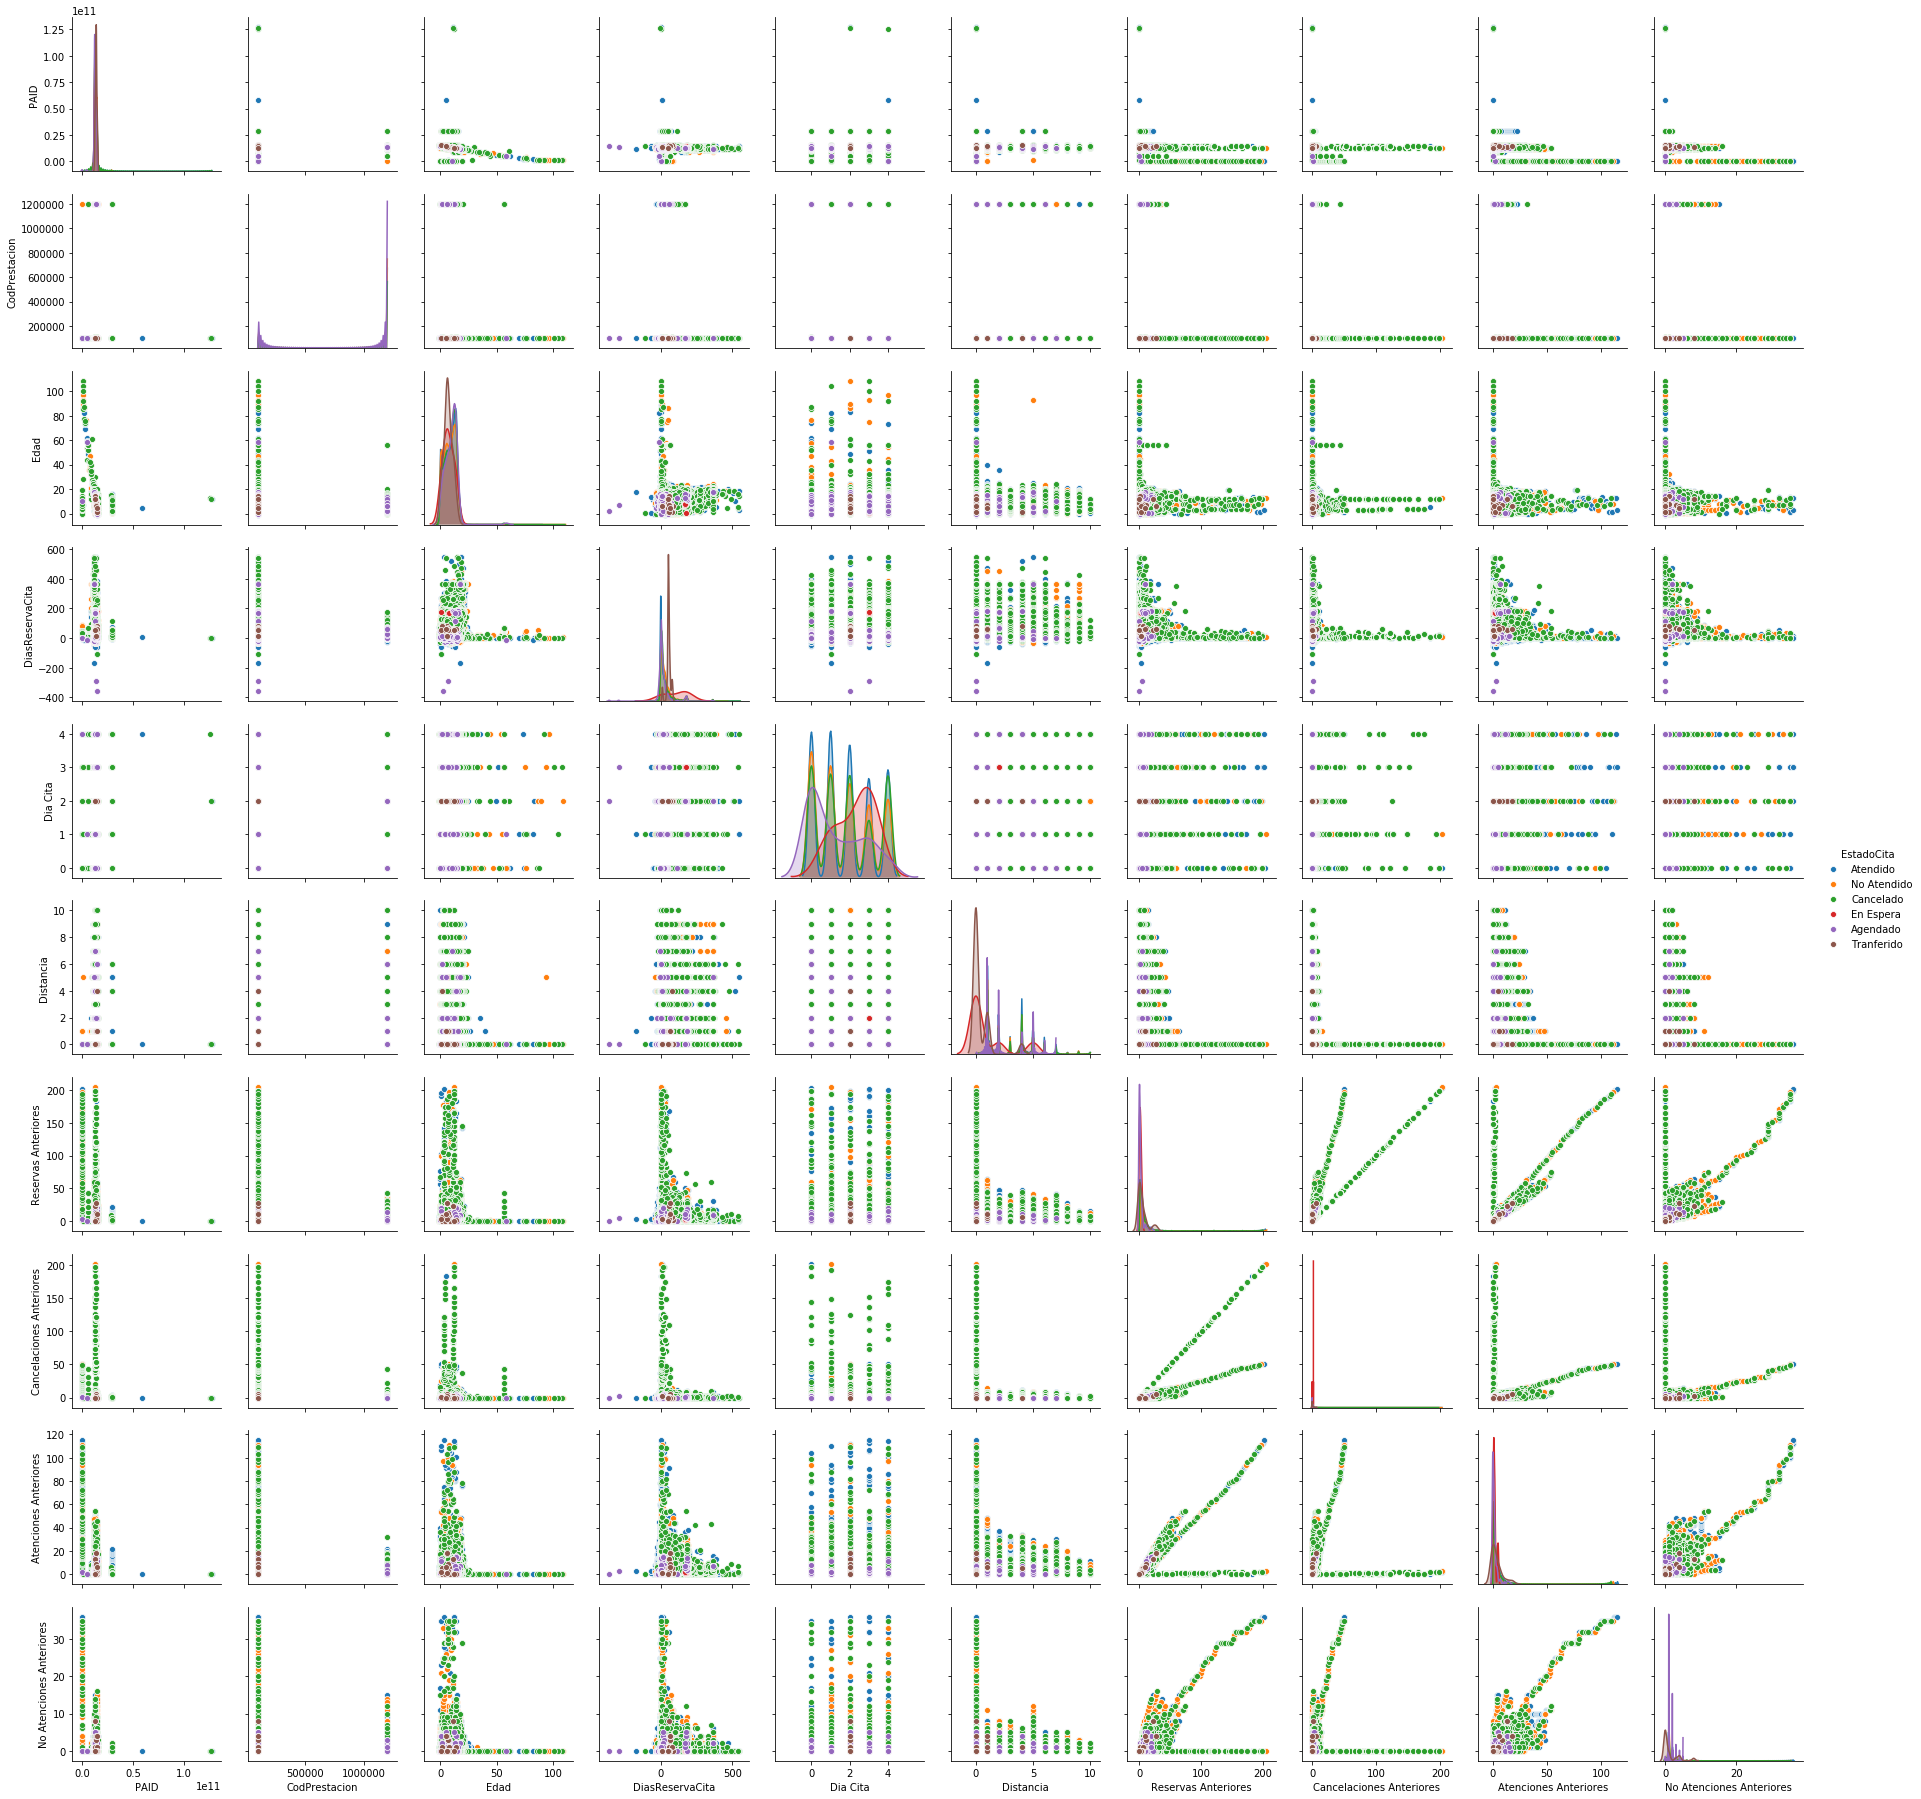

In [31]:
sns.pairplot(datos, hue="EstadoCita")